In [5]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import os as os

In [3]:
os.getcwd()

'/resources/Playground'

In [67]:
csv = ("/resources/Playground/datasets_293945_646713_climbing_statistics.csv")
df=pd.read_csv(csv, parse_dates=[0]) 
# the parse_dates=[col] allows us to force the col to a datetime dtype

In [68]:
df.head(15)

,Date,Route,Attempted,Succeeded,Success Percentage
0,2015-11-27,Disappointment Cleaver,2,0,0.000000
1,2015-11-21,Disappointment Cleaver,3,0,0.000000
2,2015-10-15,Disappointment Cleaver,2,0,0.000000
3,2015-10-13,Little Tahoma,8,0,0.000000
4,2015-10-09,Disappointment Cleaver,2,0,0.000000
5,2015-10-03,Disappointment Cleaver,10,0,0.000000
6,2015-10-03,Disappointment Cleaver,2,0,0.000000
7,2015-10-02,Kautz Glacier,2,0,0.000000
8,2015-10-02,Disappointment Cleaver,2,0,0.000000
9,2015-09-30,Disappointment Cleaver,2,0,0.000000


In [69]:
df.dtypes

Date                  datetime64[ns]
Route                         object
Attempted                      int64
Succeeded                      int64
Success Percentage           float64
dtype: object

In [70]:
df.describe(include="all")

,Date,Route,Attempted,Succeeded,Success Percentage
count,4077,4077,4077.000000,4077.000000,4077.000000
unique,391,26,NaN,NaN,NaN
top,2014-07-11 00:00:00,Disappointment Cleaver,NaN,NaN,NaN
freq,51,2728,NaN,NaN,NaN
first,2014-01-04 00:00:00,NaN,NaN,NaN,NaN
last,2015-11-27 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,5.139318,2.710817,0.498999
std,NaN,NaN,3.813516,3.534148,0.512050
min,NaN,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,2.000000,0.000000,0.000000


### the max shows we have 71 succeeded but the max Attempted is only 26.  I dont think you should be able to have more Succeeded than Attempted

In [71]:
df.sort_values("Succeeded", ascending=False)

,Date,Route,Attempted,Succeeded,Success Percentage
589,2015-07-20,Disappointment Cleaver,5,71,14.2
743,2015-07-12,Kautz Glacier,12,12,1.0
3832,2014-05-30,Disappointment Cleaver,12,12,1.0
1135,2015-06-24,Disappointment Cleaver,12,12,1.0
3017,2014-07-09,Disappointment Cleaver,12,12,1.0
...,...,...,...,...,...
1195,2015-06-21,Ingraham Direct,4,0,0.0
1196,2015-06-21,Disappointment Cleaver,2,0,0.0
1197,2015-06-21,Disappointment Cleaver,3,0,0.0
1198,2015-06-21,Disappointment Cleaver,2,0,0.0


### Luckily I only see one row where the Succeeded is higher than the Attempted.  I happen to know that late July (7/20/15) is a some of the best climbing so I will assume all 5 succeeded and set the Succeeded to 5 and the Percentage to 1.0

In [72]:
df.iat[589,3] = 5
df.iat[589,4] = 1.0
print(df.iloc[589])

Date                     2015-07-20 00:00:00
Route                 Disappointment Cleaver
Attempted                                  5
Succeeded                                  5
Success Percentage                         1
Name: 589, dtype: object


# Now we have a clean climbing statistics df

In [73]:
climb_df = df

### Loading the Weather Statistics

In [74]:
os.getcwd()

'/resources/Playground'

In [75]:
url1 = ("/resources/Playground/datasets_293945_646713_Rainier_Weather.csv")
df = pd.read_csv(url1, parse_dates=[0])
df.head(20)

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,2015-12-31,13.845000,19.062917,21.870833,21.977792,62.325833,84.915292
1,2015-12-30,13.822917,14.631208,18.493833,3.540542,121.505417,86.192833
2,2015-12-29,13.834583,6.614292,34.072917,0.000000,130.291667,85.100917
3,2015-12-28,13.710417,8.687042,70.557917,0.000000,164.683750,86.241250
4,2015-12-27,13.362500,14.140417,95.754167,0.000000,268.479167,31.090708
5,2015-12-26,13.531667,17.512917,47.574583,0.000000,268.466667,43.407208
6,2015-12-25,13.837083,3.215042,33.722500,0.000000,268.479167,86.810500
7,2015-12-24,13.681667,2.815375,76.065833,0.000000,255.000000,76.494458
8,2015-12-23,13.371667,2.005458,90.891667,0.000000,244.962500,30.403208
9,2015-12-22,13.681250,4.028125,91.316667,0.000000,244.945833,70.343500


In [76]:
df.dtypes

Date                     datetime64[ns]
Battery Voltage AVG             float64
Temperature AVG                 float64
Relative Humidity AVG           float64
Wind Speed Daily AVG            float64
Wind Direction AVG              float64
Solare Radiation AVG            float64
dtype: object

In [77]:
df.describe(include="all")

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
count,464,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
unique,464,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-07-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2014-09-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,13.478067,28.022615,62.548556,13.015701,199.444755,109.065308
std,NaN,0.214160,11.898322,28.401976,13.812058,79.859904,115.901186
min,NaN,12.827917,-0.165958,9.659917,0.000000,13.490000,0.000000
25%,NaN,13.445417,19.074167,38.161458,2.917646,157.307271,5.980437


### Temperature must be in Farenheit since the minimum is -.16 which is just below freezing in Celcius and the max is 56.1 which converted to Celcius is 132 degrees Farenheit.  Obviously way too hot.
### We can drop the battery Volatage AV because its irrelevant to our weather stats

In [78]:
df.drop(["Battery Voltage AVG"], axis=1, inplace=True)
df.columns

Index(['Date', 'Temperature AVG', 'Relative Humidity AVG',
       'Wind Speed Daily AVG', 'Wind Direction AVG', 'Solare Radiation AVG'],
      dtype='object')

In [79]:
weather_df = df

### Joinging the two dataframes into one

In [80]:
df = pd.merge(climb_df, weather_df, how="inner", on=["Date"], sort=False, indicator=False)
# sort=False because we dont need to sort the resulting frame which happens by default and slows performance
# indicator=False because we dont need an additional column with the info about each row's merge and it slows performance

In [81]:
df.head(20)

,Date,Route,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,2015-11-27,Disappointment Cleaver,2,0,0.000000,26.321667,19.715000,27.839583,68.004167,88.496250
1,2015-11-21,Disappointment Cleaver,3,0,0.000000,31.300000,21.690708,2.245833,117.549667,93.660417
2,2015-10-15,Disappointment Cleaver,2,0,0.000000,46.447917,27.211250,17.163625,259.121375,138.387000
3,2015-10-13,Little Tahoma,8,0,0.000000,40.979583,28.335708,19.591167,279.779167,176.382667
4,2015-10-09,Disappointment Cleaver,2,0,0.000000,38.260417,74.329167,65.138333,264.687500,27.791292
5,2015-10-03,Disappointment Cleaver,10,0,0.000000,31.822917,62.337083,13.125042,153.931667,196.375208
6,2015-10-03,Disappointment Cleaver,2,0,0.000000,31.822917,62.337083,13.125042,153.931667,196.375208
7,2015-10-02,Kautz Glacier,2,0,0.000000,36.064167,47.017375,6.445917,247.318333,176.265542
8,2015-10-02,Disappointment Cleaver,2,0,0.000000,36.064167,47.017375,6.445917,247.318333,176.265542
9,2015-09-30,Disappointment Cleaver,2,0,0.000000,38.729583,57.369583,11.300750,216.934167,202.812750


### I am going to round the Success Percentage column to two decimal places

In [82]:
df["Success Percentage"] = round(df["Success Percentage"],2)

In [83]:
rainier_df = df

### actually I decided to make the Success Percentage a more readable %

In [84]:
rainier_df["Success Percentage"] = rainier_df["Success Percentage"]*100
rainier_df.head(20)

,Date,Route,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,2015-11-27,Disappointment Cleaver,2,0,0.0,26.321667,19.715000,27.839583,68.004167,88.496250
1,2015-11-21,Disappointment Cleaver,3,0,0.0,31.300000,21.690708,2.245833,117.549667,93.660417
2,2015-10-15,Disappointment Cleaver,2,0,0.0,46.447917,27.211250,17.163625,259.121375,138.387000
3,2015-10-13,Little Tahoma,8,0,0.0,40.979583,28.335708,19.591167,279.779167,176.382667
4,2015-10-09,Disappointment Cleaver,2,0,0.0,38.260417,74.329167,65.138333,264.687500,27.791292
5,2015-10-03,Disappointment Cleaver,10,0,0.0,31.822917,62.337083,13.125042,153.931667,196.375208
6,2015-10-03,Disappointment Cleaver,2,0,0.0,31.822917,62.337083,13.125042,153.931667,196.375208
7,2015-10-02,Kautz Glacier,2,0,0.0,36.064167,47.017375,6.445917,247.318333,176.265542
8,2015-10-02,Disappointment Cleaver,2,0,0.0,36.064167,47.017375,6.445917,247.318333,176.265542
9,2015-09-30,Disappointment Cleaver,2,0,0.0,38.729583,57.369583,11.300750,216.934167,202.812750


### I would like to create a new column using Wind Direction Avg to create a categorical variable that has North, Northwest, West, Southwest, etc
#### Lets create an empty series with each relevant wind direction and use a for loop to fill it with the corresponding degree number

In [50]:
wind = ["N","NNE","NE","ENE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]
wind_df = pd.DataFrame(wind)
# made a df from a list of the different directions
wind_df["min_degree"] = np.NaN
wind_df["max_degree"] = np.NaN
# added two empty columns for the min and max values for the wind direction for bucketing in the direction I will fill with a for loop
wind_df.rename(columns = {0:"direction"}, inplace=True)
# renamed the column
wind_df.head(16)

,direction,min_degree,max_degree
0,N,NaN,NaN
1,NNE,NaN,NaN
2,NE,NaN,NaN
3,ENE,NaN,NaN
4,E,NaN,NaN
5,ESE,NaN,NaN
6,SE,NaN,NaN
7,SSE,NaN,NaN
8,S,NaN,NaN
9,SSW,NaN,NaN


### I looked online and for the 16 wind directions each is seperated by 22.5 degrees on the compass

In [65]:
min_degree=[]
for i in range(16):
    a = i * 22.5
    min_degree.append(a)
print(min_degree)

[0.0, 22.5, 45.0, 67.5, 90.0, 112.5, 135.0, 157.5, 180.0, 202.5, 225.0, 247.5, 270.0, 292.5, 315.0, 337.5]


### create a max column by adding 22.49 to each value in the min_degree list

In [66]:
max_degree=[]
for i in min_degree:
    a = i + 22.499999
    max_degree.append(a)
print(max_degree)

[22.499999, 44.999999, 67.499999, 89.999999, 112.499999, 134.999999, 157.499999, 179.999999, 202.499999, 224.999999, 247.499999, 269.999999, 292.499999, 314.999999, 337.499999, 359.999999]


### set each list as the column values in the wind_df

In [75]:
wind_df["min_degree"] = min_degree
wind_df["max_degree"] = max_degree
wind_df.head()

,direction,min_degree,max_dgree,max_degree
0,N,0.0,22.499999,22.499999
1,NNE,22.5,44.999999,44.999999
2,NE,45.0,67.499999,67.499999
3,ENE,67.5,89.999999,89.999999
4,E,90.0,112.499999,112.499999


In [76]:
wind_df.drop(["max_dgree"], axis=1, inplace=True)
## i misspelled the column name earlier and created a column called max_dgree.  I corrected it already in the code above so you cant see it

In [78]:
wind_df.head()

,direction,min_degree,max_degree
0,N,0.0,22.499999
1,NNE,22.5,44.999999
2,NE,45.0,67.499999
3,ENE,67.5,89.999999
4,E,90.0,112.499999


# Ill come back to this and see if I can add a column in the weather_df to bin the Wind_Direction_avg column using the wind_df info.

### Regression Time
#### First we will do some linear regressions before multiple regressions

In [54]:
import sklearn as sklearn
import seaborn as sns

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x=rainier_df[["Temperature AVG"]]
y=rainier_df["Success Percentage"]
lr.fit(x,y)
print("the intercept is",lr.intercept_)
print("the coeff is",lr.coef_)

the intercept is 19.159046476556018
the coeff is [0.64429159]


In [56]:
# this allows us to take a Temperature value and determine the Success %.  
# For example if the temp is 32 farenheit then 
success_chance = (32*.64429159) + 19.159046476556018
print("The success chance for a 32 degree day is",success_chance)

The success chance for a 32 degree day is 39.77637735655602


(0, 262.5757734423689)

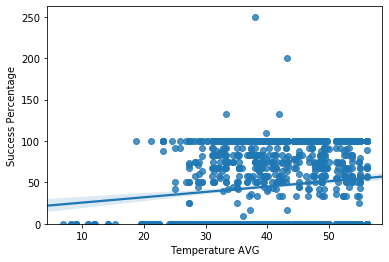

In [57]:
sns.regplot(x="Temperature AVG", y="Success Percentage", data=rainier_df)
plt.ylim(0,)

## What this makes clear is we have some incorrect data.  We shouldnt be able to have success percentage over 100.
#### Should have done a visualization like this earlier to catch this sort of thing....
## Our data is not actually continous.  We have Success % in bins essentially. We also have an upper and lower limit to our dependant variable, 0 and 100.

In [58]:
rainier_df = rainier_df[rainier_df["Success Percentage"] < 100.1]
# im just dropping the rows rather than adjusting them manually

(0, 105.0752443001974)

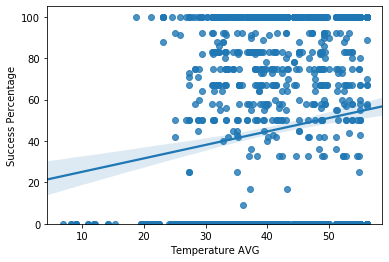

In [59]:
# replotting
sns.regplot(x="Temperature AVG", y="Success Percentage", data=rainier_df)
plt.ylim(0,)

## Lets check the R^2 anyway

In [60]:
lr.score(x,y)

0.0161042489187192

#### Thats a super low R^2 value, as expected.  The correlation between Temp and Success is very small.

## residual plot check

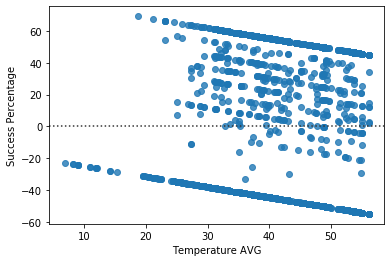

In [61]:
sns.residplot(rainier_df["Temperature AVG"], rainier_df["Success Percentage"])

### This shows our data is not spread evenly around the mean value indicating this is probably not a linear relationship. 

# At this stage, realizing our data is not truly continous, a regression is probably not the best choice as a predictor model.

### We really need a Classification Model for modeling a dependant variable that has discrete classes/categories.  The KNN (K Nearest Neighbors) is probably a good choice.

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x,y)
neigh

ValueError: Unknown label type: 'continuous'

#### We need to change the Success Percentage column to a categorical variable.

In [85]:
rainier_df["Success Percentage"].value_counts()

0.0      914
100.0    606
67.0      52
50.0      48
75.0      48
83.0      48
58.0      26
92.0      23
33.0      13
42.0      10
64.0      10
73.0       8
82.0       8
55.0       7
88.0       7
60.0       7
45.0       6
80.0       6
91.0       5
90.0       4
25.0       4
57.0       3
36.0       3
56.0       3
78.0       3
70.0       3
43.0       3
71.0       2
40.0       2
17.0       2
86.0       2
133.0      2
89.0       2
44.0       1
9.0        1
110.0      1
250.0      1
200.0      1
Name: Success Percentage, dtype: int64

In [86]:
rainier_df["Success Percentage"] = rainier_df["Success Percentage"].astype("str")
rainier_df.dtypes

Date                     datetime64[ns]
Route                            object
Attempted                         int64
Succeeded                         int64
Success Percentage               object
Temperature AVG                 float64
Relative Humidity AVG           float64
Wind Speed Daily AVG            float64
Wind Direction AVG              float64
Solare Radiation AVG            float64
dtype: object

In [87]:
y = rainier_df["Success Percentage"]


In [102]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x,y)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [108]:
a = np.array([59])
b =  np.reshape(a, (1,-1))

predict = neigh.predict(b)
print("When the temp avg is", b,"then the predicted Success % is", predict)



When the temp avg is [[59]] then the predicted Success % is ['100.0']


### To really complete this task we need to do a train/test split for more accurate training.  We need to test the model on different K values.  We need to calculate an accuracy score for each K value.  Then we can choose the best k score to model with.  We would also like to test this with probab 